<a href="https://colab.research.google.com/github/yugasriv/SCT_DS_1/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


First 5 rows of dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Dataset after encoding:
   age  job  marital  education  default  balance  housing  

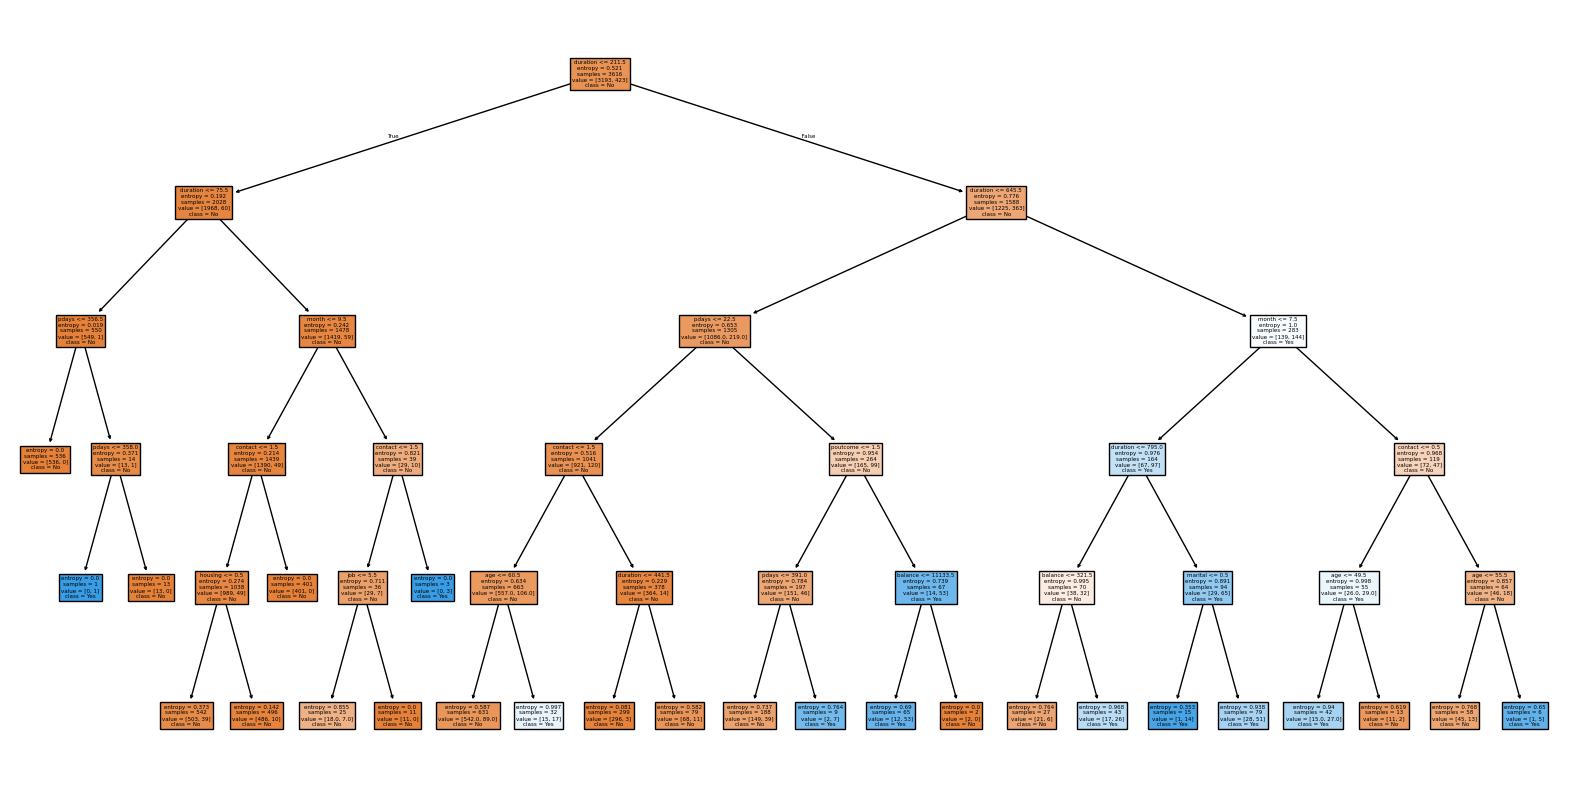

In [3]:


# decision_tree_bank.py
# Task 03: Decision Tree Classifier on Bank Marketing Dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import os
import requests
import zipfile

# ---------------------------
# Step 1: Download dataset if not present
# ---------------------------
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"
zip_file = "bank.zip"
csv_file = "bank.csv"

if not os.path.exists(csv_file):
    print("Downloading dataset...")
    r = requests.get(dataset_url)
    with open(zip_file, "wb") as f:
        f.write(r.content)

    print("Extracting dataset...")
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall()

    os.remove(zip_file)

# ---------------------------
# Step 2: Load dataset
# ---------------------------
df = pd.read_csv(csv_file, delimiter=";")
print("\nFirst 5 rows of dataset:")
print(df.head())

# ---------------------------
# Step 3: Encode categorical data
# ---------------------------
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

print("\nDataset after encoding:")
print(df.head())

# ---------------------------
# Step 4: Define features and target
# ---------------------------
X = df.drop("y", axis=1)
y = df["y"]

# ---------------------------
# Step 5: Split dataset
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------
# Step 6: Train Decision Tree
# ---------------------------
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
model.fit(X_train, y_train)

# ---------------------------
# Step 7: Predictions
# ---------------------------
y_pred = model.predict(X_test)

# ---------------------------
# Step 8: Evaluation
# ---------------------------
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------------------
# Step 9: Plot Decision Tree
# ---------------------------
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.savefig("decision_tree.png")
print("\nDecision tree visualization saved as 'decision_tree.png'")
plt.show()